# <h1><center>Tarea:Modelo LSTM.</center></h1>

### <h1><center>Andrea Guzmán Luna.</center></h1>

# <h1><center>11 de abril de 2025.</center></h1>

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

### ANÁLISIS DE LA BASE

In [20]:
crypto_data = pd.read_csv('/content/coin_Aave.csv')

In [15]:
crypto_data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,05/10/2020,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,06/10/2020,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,07/10/2020,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,08/10/2020,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,09/10/2020,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


In [16]:
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        275 non-null    int64  
 1   Name       275 non-null    object 
 2   Symbol     275 non-null    object 
 3   Date       275 non-null    object 
 4   High       275 non-null    float64
 5   Low        275 non-null    float64
 6   Open       275 non-null    float64
 7   Close      275 non-null    float64
 8   Volume     275 non-null    float64
 9   Marketcap  275 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 21.6+ KB


In [17]:
crypto_data.isna().sum()

,0
SNo,0
Name,0
Symbol,0
Date,0
High,0
Low,0
Open,0
Close,0
Volume,0
Marketcap,0


In [21]:
crypto_data1=crypto_data.drop(['Date','SNo','Name','Symbol'], axis=1)

In [22]:
crypto_data1.corr()

,High,Low,Open,Close,Volume,Marketcap
High,1.000000,0.986692,0.993092,0.993260,0.662403,0.993034
Low,0.986692,1.000000,0.987773,0.993655,0.568600,0.992230
Open,0.993092,0.987773,1.000000,0.986409,0.602500,0.985926
Close,0.993260,0.993655,0.986409,1.000000,0.619731,0.999130
Volume,0.662403,0.568600,0.602500,0.619731,1.000000,0.620913
Marketcap,0.993034,0.992230,0.985926,0.999130,0.620913,1.000000


<Axes: >

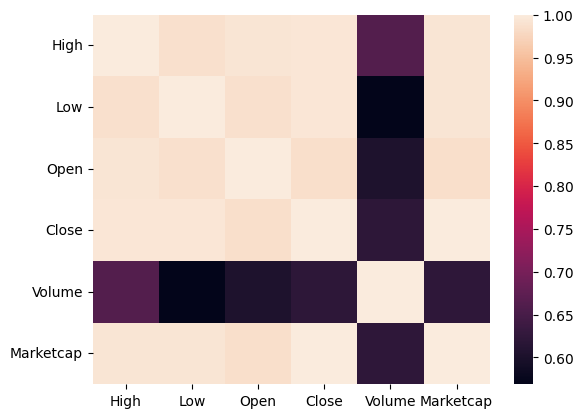

In [25]:
sns.heatmap(crypto_data1.corr())

In [27]:
# Cargar los dato de entrenamiento
crypto_data = pd.read_csv('/content/coin_Aave.csv', parse_dates=['Date'])

# Filtrar columnas útiles
crypto_data = crypto_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume','Marketcap']]

# Ordenar por fecha
crypto_data = crypto_data.sort_values('Date')

In [29]:
# Escalado de datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(crypto_data.drop(columns='Date'))

# Crear secuencias temporales
def create_dataset(dataset, look_back=10):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back, :-1])     # todas menos 'Close' porque queremos que sea el objetivo
        Y.append(dataset[i + look_back, 3])         # columna 3 = 'Close'
    return np.array(X), np.array(Y)

X_train, y_train = create_dataset(scaled_data, look_back=10)

In [30]:
# Modelo LSTM
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 10, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,009 (199.25 KB)

 Trainable params: 51,009 (199.25 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=16,validation_split=0.2, verbose=1)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0060 - val_loss: 0.0225
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0064 - val_loss: 0.0243
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0063 - val_loss: 0.0232
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0047 - val_loss: 0.0260
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0061 - val_loss: 0.0253
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0077 - val_loss: 0.0237
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0081 - val_loss: 0.0295
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0101 - val_loss: 0.0258
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0084 - val_loss: 0.0224
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0062 - val_loss: 0.0270
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0068 - val_loss: 0.0276
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0

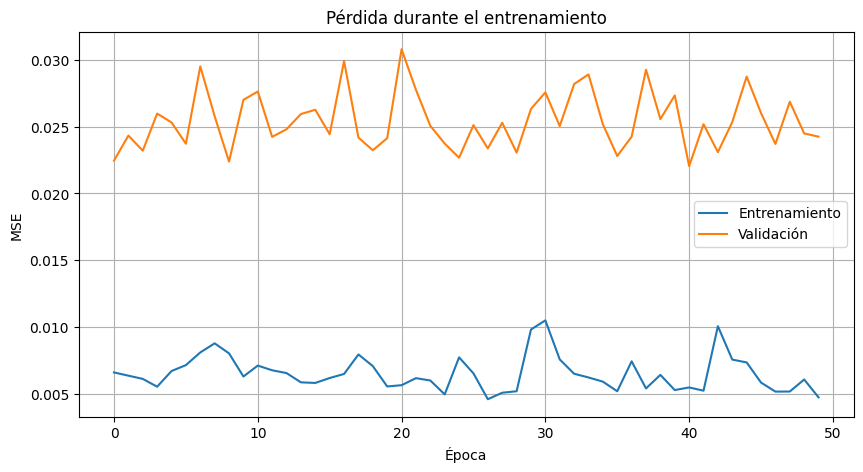

In [47]:
# Graficar pérdida
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
# Hacer predicciones
pred_scaled = model.predict(X_train)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [55]:
# Desescalar valores
descalar = np.zeros((len(pred_scaled), scaled_data.shape[1]))
descalar[:, 3] = pred_scaled.flatten()  # insertar en columna de 'Close'
pred_real = scaler.inverse_transform(descalar)[:, 3]

descalar[:, 3] = y_train
real_close = scaler.inverse_transform(descalar)[:, 3]

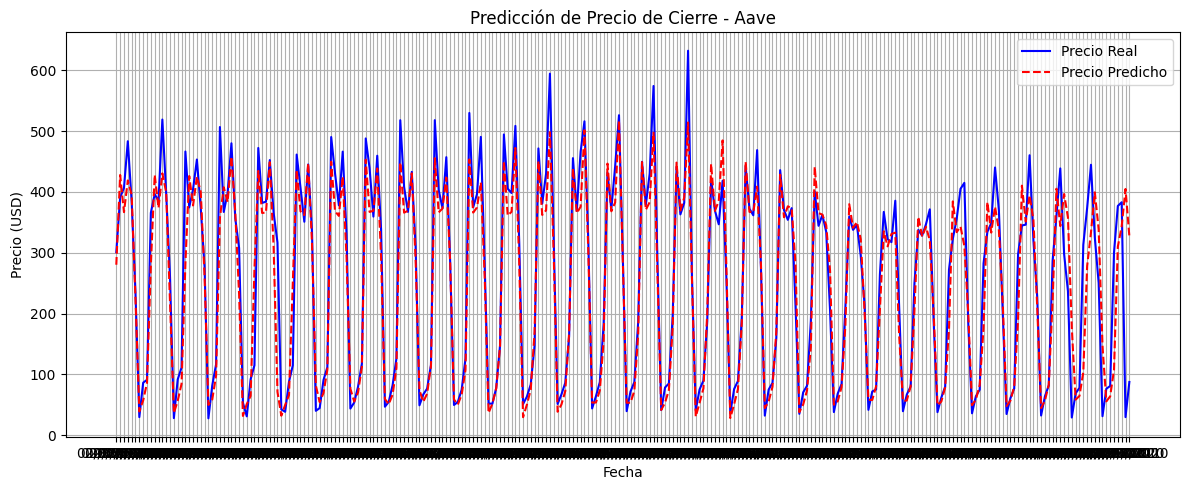

In [57]:
# Graficar precios reales vs predichos
fechas = crypto_data['Date'].values[10:]

plt.figure(figsize=(12, 5))
plt.plot(fechas, real_close, label='Precio Real', color='blue')
plt.plot(fechas, pred_real, label='Precio Predicho', color='red', linestyle='dashed')
plt.title('Predicción de Precio de Cierre - Aave')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
# Evaluación del modelo
mae = mean_absolute_error(real_close, pred_real)
rmse = np.sqrt(mean_squared_error(real_close, pred_real))
r2 = r2_score(real_close, pred_real)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 34.11
RMSE: 56.22
R² Score: 0.8788


MAE: El modelo presenta, en promedio, una desviación absoluta de 34.11 unidades con respecto al valor real, lo que sugiere una buena precisión general.

RMSE: El valor elevado respecto al MAE sugiere la presencia de algunos errores atípicos (outliers) que afectan el modelo.

R²: Indica que el modelo explica aproximadamente el 87.88% de la varianza total de la variable dependiente (Close), lo cual representa un ajuste sólido.

En conjunto, estos resultados reflejan un modelo con buena capacidad explicativa.